In [1]:
# from google.colab import files
# files.upload()

### **IBM HR Analytics Employee Attrition & Performance**
<img src="https://whatfix.com/blog/wp-content/uploads/2022/09/employee-churn.png" width="2000" height="500">


In the realm of machine learning and data analysis, the exploration of employee attrition within organizations stands as a critical area of study. Employee attrition, the process by which staff members leave the workforce over a given period, can have a substantial impact on the efficiency and economic stability of an organization. Understanding and predicting employee turnover is essential for maintaining a productive and engaged workforce.

#### **Problem Statement**
The primary objective of this project is to apply decision tree-based models to analyze and predict employee attrition. Decision trees, known for their simplicity, interpretability, and efficiency, are particularly well-suited for this task. These models can handle complex datasets with multiple features, making them ideal for dissecting the multifaceted nature of employee attrition.

#### **Dataset Overview**
The dataset in focus originates from a synthetic dataset created by IBM data scientists. It encapsulates various attributes of employees, including age, job role, marital status, education level, and more. The dataset comprises both categorical and numerical data, offering a comprehensive view of the employee profiles.

#### **Anticipated Insights**
Through this analysis, we aim to uncover the key factors contributing to employee attrition. By applying models like Random Forest, Gradient Boosting, LightGBM, XGBoost, Logistic Regression and SVM we expect to identify the most significant predictors of attrition. This insight will not only aid in predicting future attrition but also assist HR departments in formulating strategies to retain talent and improve overall employee satisfaction.

---


# **I. Importing Necessary Libraries and Dataset**

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from lightgbm.sklearn import LGBMClassifier
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
#read data from csv file
employee_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first few rows of the dataset to understand its structure
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **II. Exploratory Data Analysis**

In [4]:
#dataset shape
employee_data_shape = employee_data.shape
print('rows: ', employee_data_shape[0])
print('columns: ', employee_data_shape[1])

rows:  1470
columns:  35


In [5]:
#categorical columns
categorical_columns = employee_data.select_dtypes(include=['object']).columns

#number of categorical columns
categorical_columns_len = len(categorical_columns)

print('no. of categorical columns:', categorical_columns_len)
print('categorical columns:', categorical_columns)

no. of categorical columns: 9
categorical columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [6]:
#non-categorical columns
non_categorical_columns = employee_data.select_dtypes(include=['int64', 'float64']).columns

#number of categorical columns
non_categorical_columns_len = len(non_categorical_columns)

print('no. of non-categorical columns:', non_categorical_columns_len)
print('non-categorical columns:', non_categorical_columns)

no. of non-categorical columns: 26
non-categorical columns: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


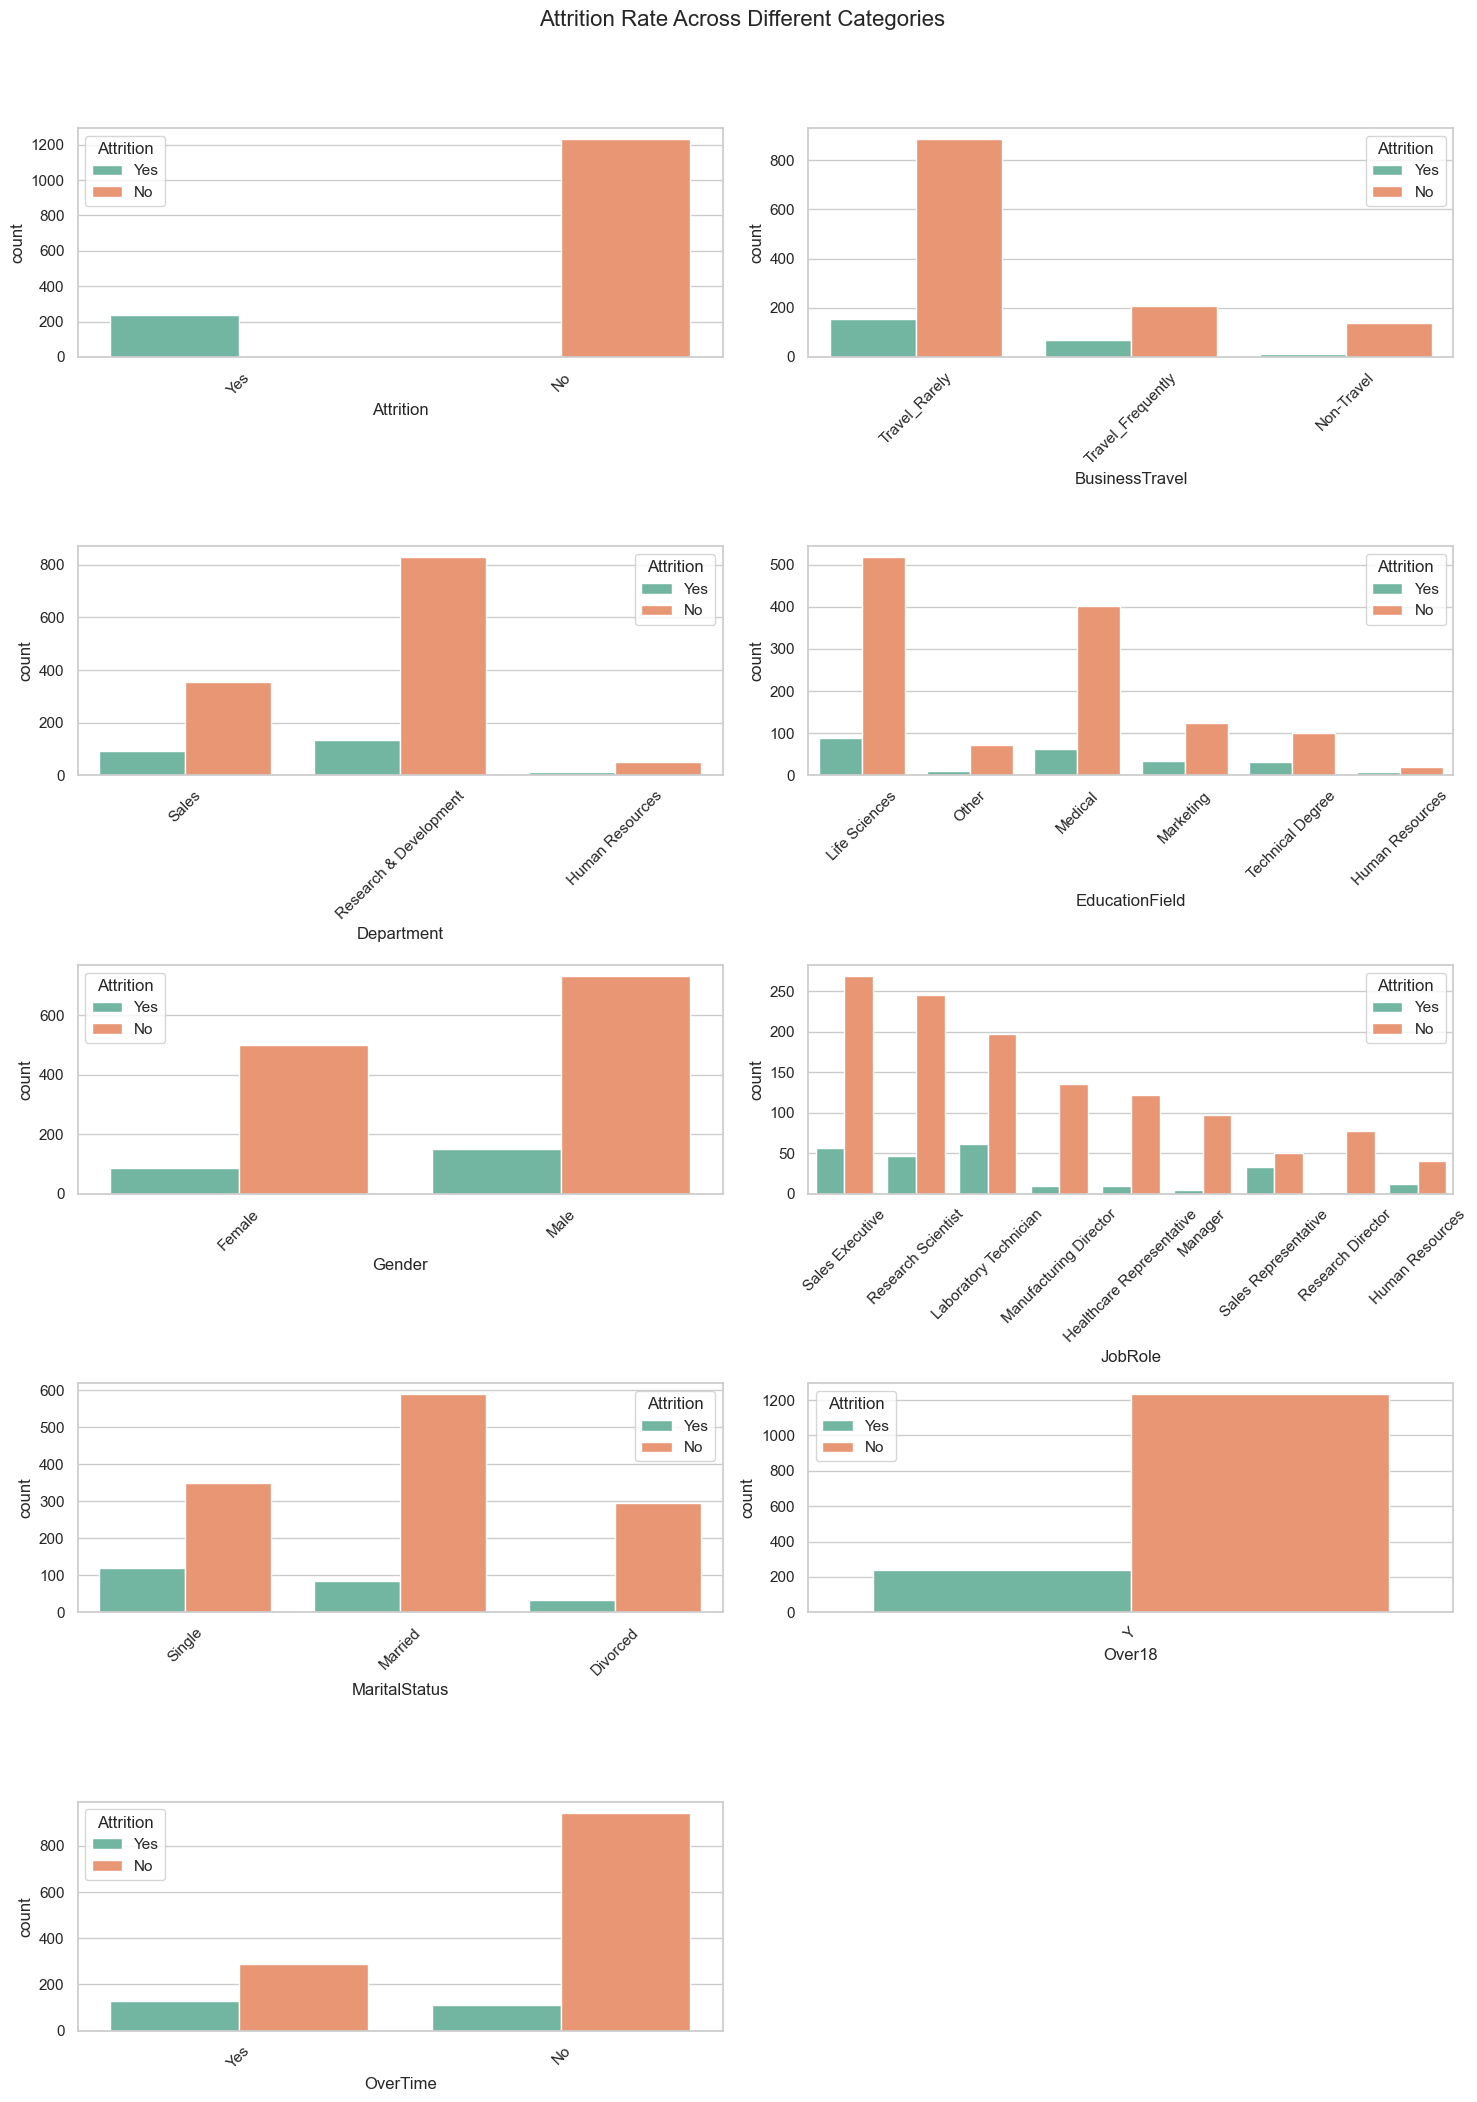

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def categorical_distributions(data):
      # Setting the aesthetic style of the plots
      sns.set(style="whitegrid")

      # Attrition rate across different categorical variables
      categorical_features = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
            'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

      # Creating subplots
      fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
      axes = axes.flatten()  # Flattening the axes array for easy iteration

      # Plotting each categorical variable against Attrition
      for i, feature in enumerate(categorical_features):
          sns.countplot(x=feature, hue='Attrition', data=data, ax=axes[i], palette="Set2")
          axes[i].tick_params(axis='x', rotation=45)  # Rotate the x-axis labels for each subplot

      # Adjusting the layout
      plt.tight_layout()
      plt.delaxes(axes[-1])  # Delete the extra subplot
      plt.suptitle('Attrition Rate Across Different Categories', y=1.05, fontsize=16)

      plt.show()
categorical_distributions(employee_data)


The visualizations provide insights into the attrition rate across different categories:

**1. Education:** There doesn't appear to be a strong correlation between education level and attrition rate. Attrition is present across all education levels, but it does not significantly vary as education level changes.

**2. Job Role:** Certain job roles, like Sales Representative and Laboratory Technician, show a higher attrition rate compared to others like Manager or Research Director. This could indicate that roles with possibly lower entry barriers or lower levels of specialization might have higher turnover.

**3. Marital Status:** Single employees tend to have a higher attrition rate compared to married or divorced employees. This might be due to different life stages or commitments.

**4. OverTime:** Employees who work overtime show a significantly higher attrition rate. This could point towards work-life balance being a crucial factor in employee retention.

**5. WorkLifeBalance:** Interestingly, employees who rated their work-life balance as low (1) show a higher attrition rate. This aligns with the observation regarding overtime and suggests that maintaining a healthy work-life balance is vital for employee retention.



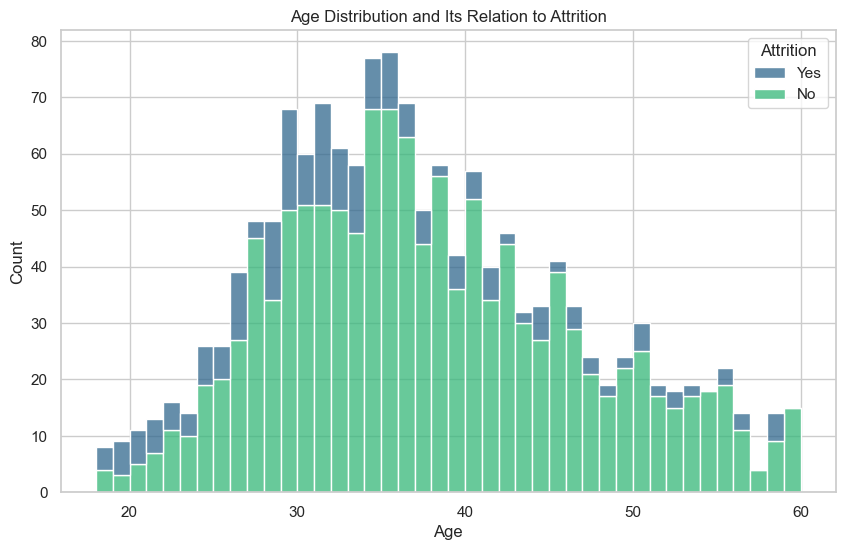

In [8]:
# Age distribution and its relation to attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=employee_data, x="Age", hue="Attrition", multiple="stack", palette="viridis", binwidth=1)
plt.title("Age Distribution and Its Relation to Attrition")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The age distribution in relation to attrition reveals:

**1. Younger Employees and Attrition:** There's a noticeable trend where younger employees (especially in their late 20s to early 30s) show higher attrition rates compared to older age groups. This could be attributed to younger employees being in the early stages of their careers and more likely to change jobs for better opportunities or career advancement.

**2.Decrease in Attrition with Age:** As age increases, the attrition rate seems to decrease. Employees in their mid-30s and onwards show lower attrition rates. This might be due to increased job stability, higher positions, or more responsibilities both in their personal and professional lives.

**3. Peaks and Troughs:** Certain age groups, like mid-20s and early 30s, have distinct peaks in attrition, suggesting that these age ranges might be critical points for employee turnover.

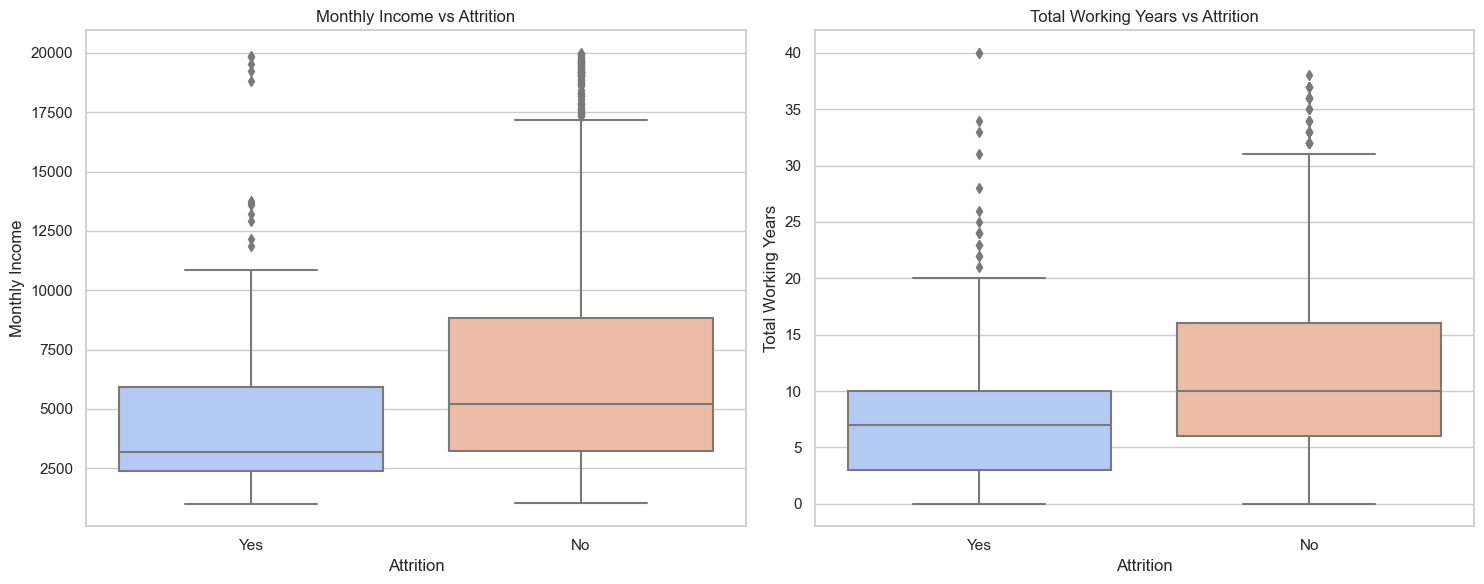

In [9]:
# Box plots for Monthly Income and Total Working Years by Attrition status
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Monthly Income vs Attrition
sns.boxplot(x="Attrition", y="MonthlyIncome", data=employee_data, ax=axes[0], palette="coolwarm")
axes[0].set_title("Monthly Income vs Attrition")
axes[0].set_xlabel("Attrition")
axes[0].set_ylabel("Monthly Income")

# Total Working Years vs Attrition
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=employee_data, ax=axes[1], palette="coolwarm")
axes[1].set_title("Total Working Years vs Attrition")
axes[1].set_xlabel("Attrition")
axes[1].set_ylabel("Total Working Years")

plt.tight_layout()
plt.show()

The box plots for Monthly Income and Total Working Years in relation to attrition reveal the following insights:

**1. Monthly Income:** There's a noticeable difference in the distribution of monthly income between employees who left (Attrition = Yes) and those who stayed (Attrition = No).
Employees who left generally had lower median monthly incomes compared to those who stayed. This could suggest that compensation is a significant factor in an employee's decision to stay with or leave a company.
The wider range and higher outliers in the monthly income for employees who stayed might indicate more opportunities for financial growth within the company, which could contribute to higher retention.

**2. Total Working Years:** Employees who left the company tend to have fewer total working years compared to those who stayed. This aligns with the earlier observation about younger employees being more likely to leave.
The more extensive range of working years among employees who stayed suggests a correlation between longer tenure at the company and lower attrition rates.

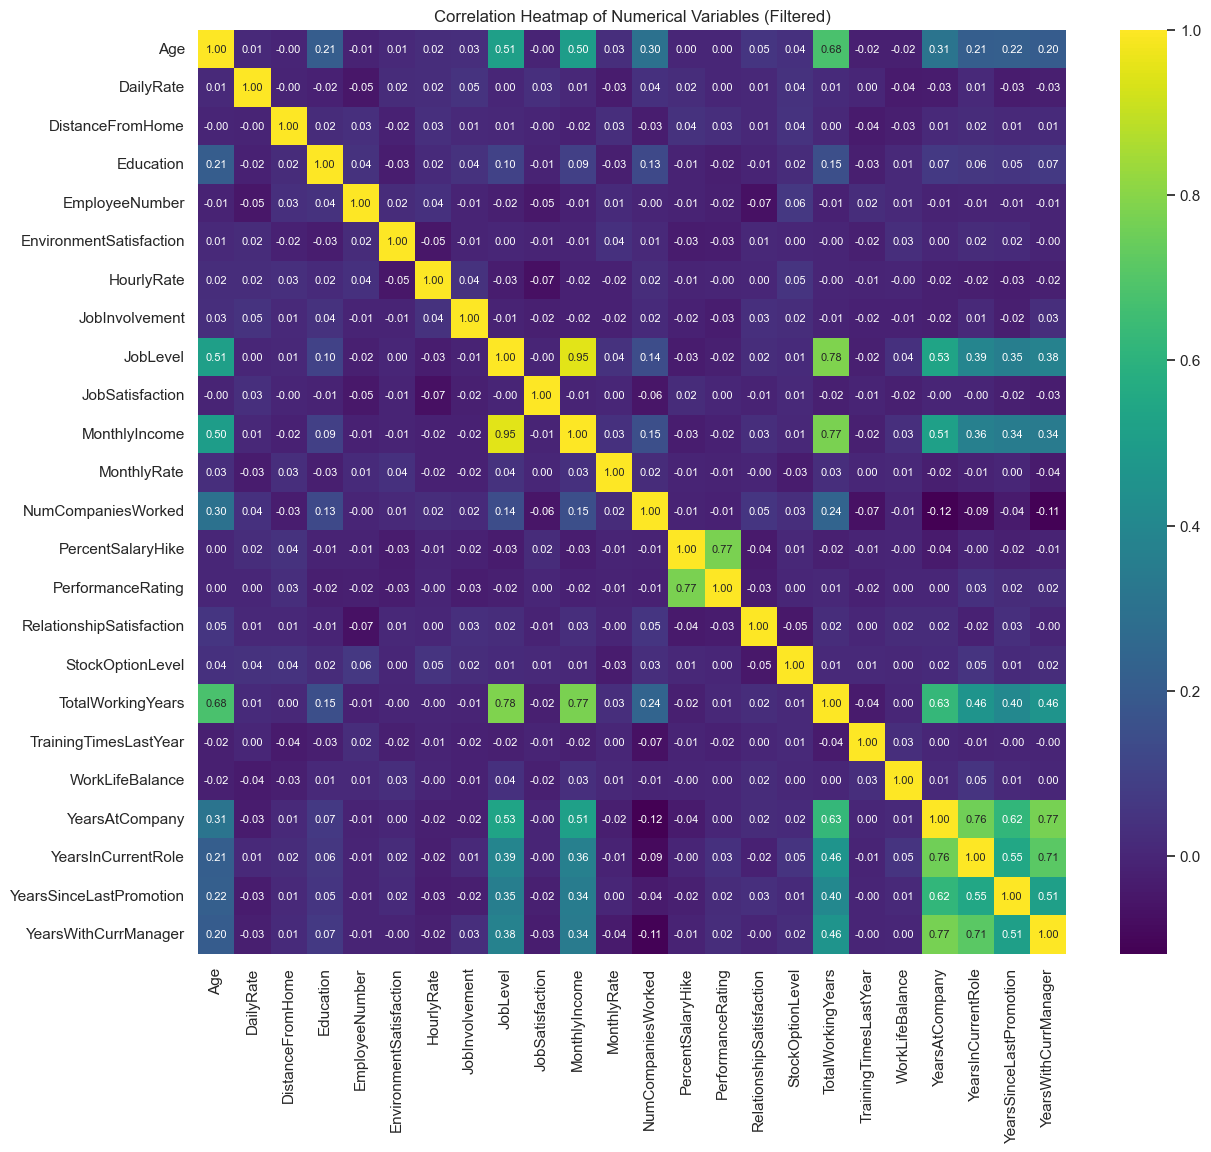

In [10]:
# Removing constant columns from the dataset
non_constant_columns = employee_data.loc[:, employee_data.apply(pd.Series.nunique) != 1]
numerical_data_filtered = non_constant_columns.select_dtypes(include=['int64', 'float64'])

# Recalculating the correlation matrix
correlation_matrix_filtered = numerical_data_filtered.corr()

# Adjusting the heatmap with the filtered data
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", cmap="viridis", annot_kws={"size": 8})
plt.title("Correlation Heatmap of Numerical Variables (Filtered)")
plt.show()

The correlation heatmap provides insights into how different numerical variables in the dataset are related to each other:

**1. High Correlation Pairs:** Some variables show a high degree of correlation. For example, TotalWorkingYears is highly correlated with Age, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, and YearsSinceLastPromotion. This is expected as these variables are all related to the length of an employee's career and tenure at the company.

**2. Moderate Correlations:** There are also moderate correlations between some variables, such as between MonthlyIncome and TotalWorkingYears, indicating that employees with more years of working experience tend to have higher salaries.

**3. Low Correlation with Attrition:** Interestingly, most variables have a relatively low correlation with Attrition, suggesting that no single factor strongly predicts whether an employee will leave. However, Age, TotalWorkingYears, and YearsWithCurrManager have a somewhat more negative correlation with attrition, implying that more experienced and older employees, or those with a longer tenure with their current manager, are less likely to leave.

**4. Job Level and Income:** JobLevel is strongly correlated with MonthlyIncome, which is expected as higher job positions usually come with higher pay.

# **III. Data Cleaning**

***a. Handling Missing values, duplicate rows and checking data types***

In [11]:
# Checking for missing values
missing_values = employee_data.isnull().sum()

# Checking for duplicate rows
duplicate_rows = employee_data.duplicated().sum()

# Identifying constant columns
constant_columns = [col for col in employee_data.columns if employee_data[col].nunique() == 1]

# Summarizing the findings
missing_values_summary = missing_values[missing_values > 0]
constant_columns_summary = constant_columns

missing_values_summary, duplicate_rows, constant_columns_summary


(Series([], dtype: int64), 0, ['EmployeeCount', 'Over18', 'StandardHours'])

In [12]:
# Removing constant columns
employee_data_cleaned = employee_data.drop(columns=constant_columns_summary)

# Checking data types of remaining columns
data_types = employee_data_cleaned.dtypes

data_types

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

Based on the initial data cleaning checks:

**1. Missing Values:** There are no missing values in the dataset.

**2. Duplicate Rows:** There are no duplicate rows in the dataset.

**3. Constant Columns:** The dataset contains a few constant columns - 'EmployeeCount', 'Over18', and 'StandardHours'. These columns have the same value for ​​all records and therefore do not provide any variability or useful information for analysis.

***b. Outlier Detection and Handling***

In [13]:
# Identifying outliers using the IQR method for each numerical feature
outliers = {}

for column in employee_data_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = employee_data_cleaned[column].quantile(0.25)
    Q3 = employee_data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers[column] = employee_data_cleaned[(employee_data_cleaned[column] < lower_bound) |
                                             (employee_data_cleaned[column] > upper_bound)].shape[0]


outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Number of Outliers'])
outliers_df.sort_values(by='Number of Outliers', ascending=False)

,Number of Outliers
TrainingTimesLastYear,238
PerformanceRating,226
MonthlyIncome,114
YearsSinceLastPromotion,107
YearsAtCompany,104
StockOptionLevel,85
TotalWorkingYears,63
NumCompaniesWorked,52
YearsInCurrentRole,21
YearsWithCurrManager,14


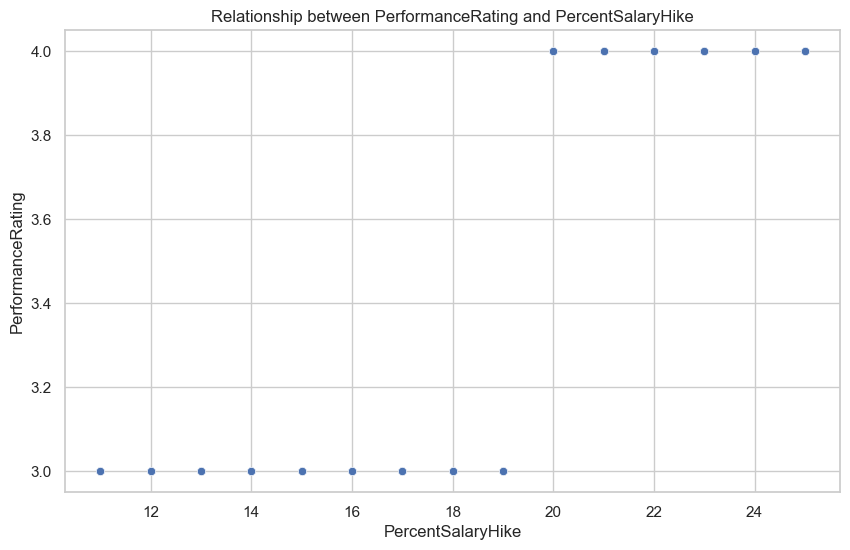

In [14]:
# Creating a scatter plot to visualize the relationship between 'PerformanceRating' and 'PercentSalaryHike'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=employee_data_cleaned, x='PercentSalaryHike', y='PerformanceRating')
plt.title('Relationship between PerformanceRating and PercentSalaryHike')
plt.show()

The scatter plot illustrates the relationship between PerformanceRating and PercentSalaryHike. We observe that:

The points with a PerformanceRating of 4 are aligned with higher values of PercentSalaryHike.
There is a clear separation between points with a PerformanceRating of 3 and 4, with the latter generally associated with higher PercentSalaryHike.
This visualization suggests that the points identified as potential outliers in PerformanceRating (values of 4) are not arbitrary but are related to a corresponding increase in PercentSalaryHike. In the context of this relationship, these points do not seem to be true outliers, as they follow an expected trend where higher performance ratings are associated with higher percentage salary hikes.

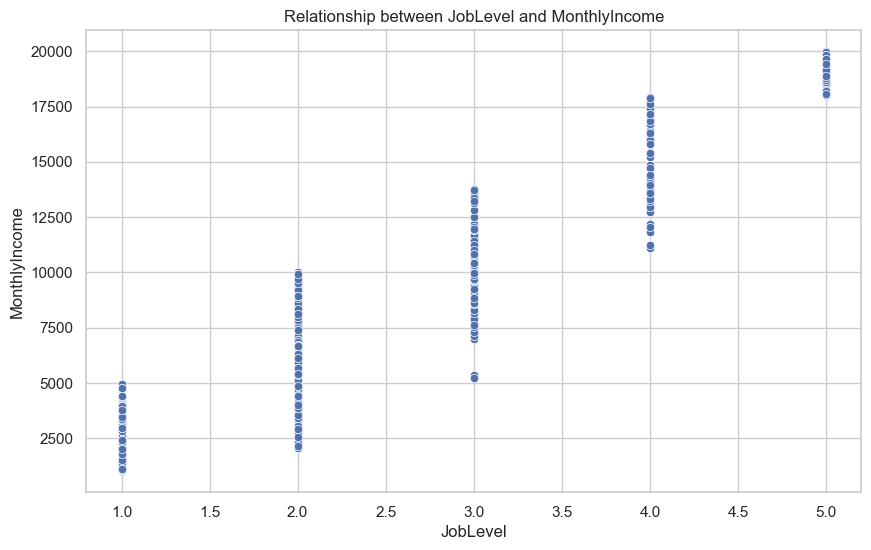

In [15]:
# Relationship between MonthlyIncome and JobLevel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=employee_data_cleaned, x='JobLevel', y='MonthlyIncome')
plt.title('Relationship between JobLevel and MonthlyIncome')
plt.show()

There is a clear positive trend between JobLevel and MonthlyIncome. Higher job levels are associated with higher monthly incomes. This pattern suggests that the higher income values are not random outliers but are related to the higher job positions within the organization.

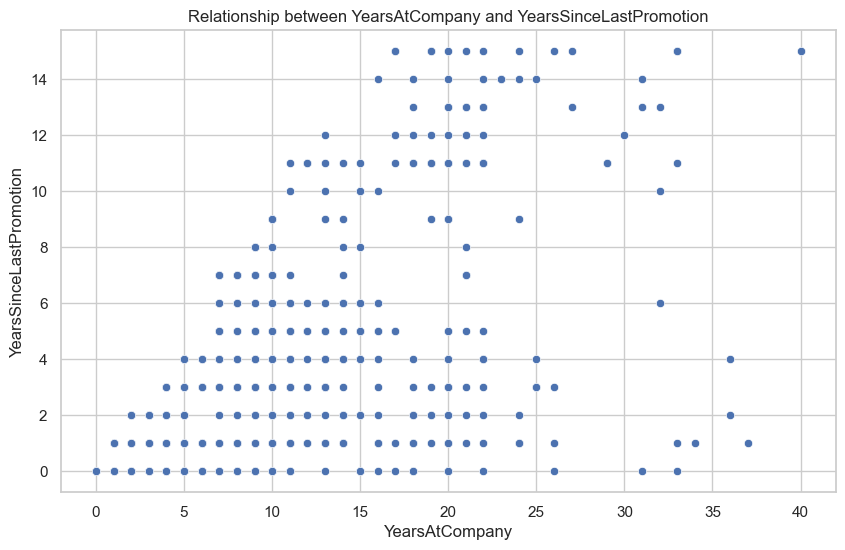

In [16]:
# Creating scatter plots to visualize the relationships

plt.figure(figsize=(10, 6))
sns.scatterplot(data=employee_data_cleaned, x='YearsAtCompany', y='YearsSinceLastPromotion')
plt.title('Relationship between YearsAtCompany and YearsSinceLastPromotion')
plt.show()


YearsSinceLastPromotion vs. YearsAtCompany: There is a noticeable positive trend. Employees who have been at the company longer tend to have gone longer since their last promotion. This suggests that the higher values in YearsSinceLastPromotion are not random outliers, but a reflection of longer tenure at the company.

 Employees with longer tenures, generally experience longer intervals since their last promotion. This suggests that these values are not outliers in the traditional sense but are consistent with the dynamics of career progression within the organization.

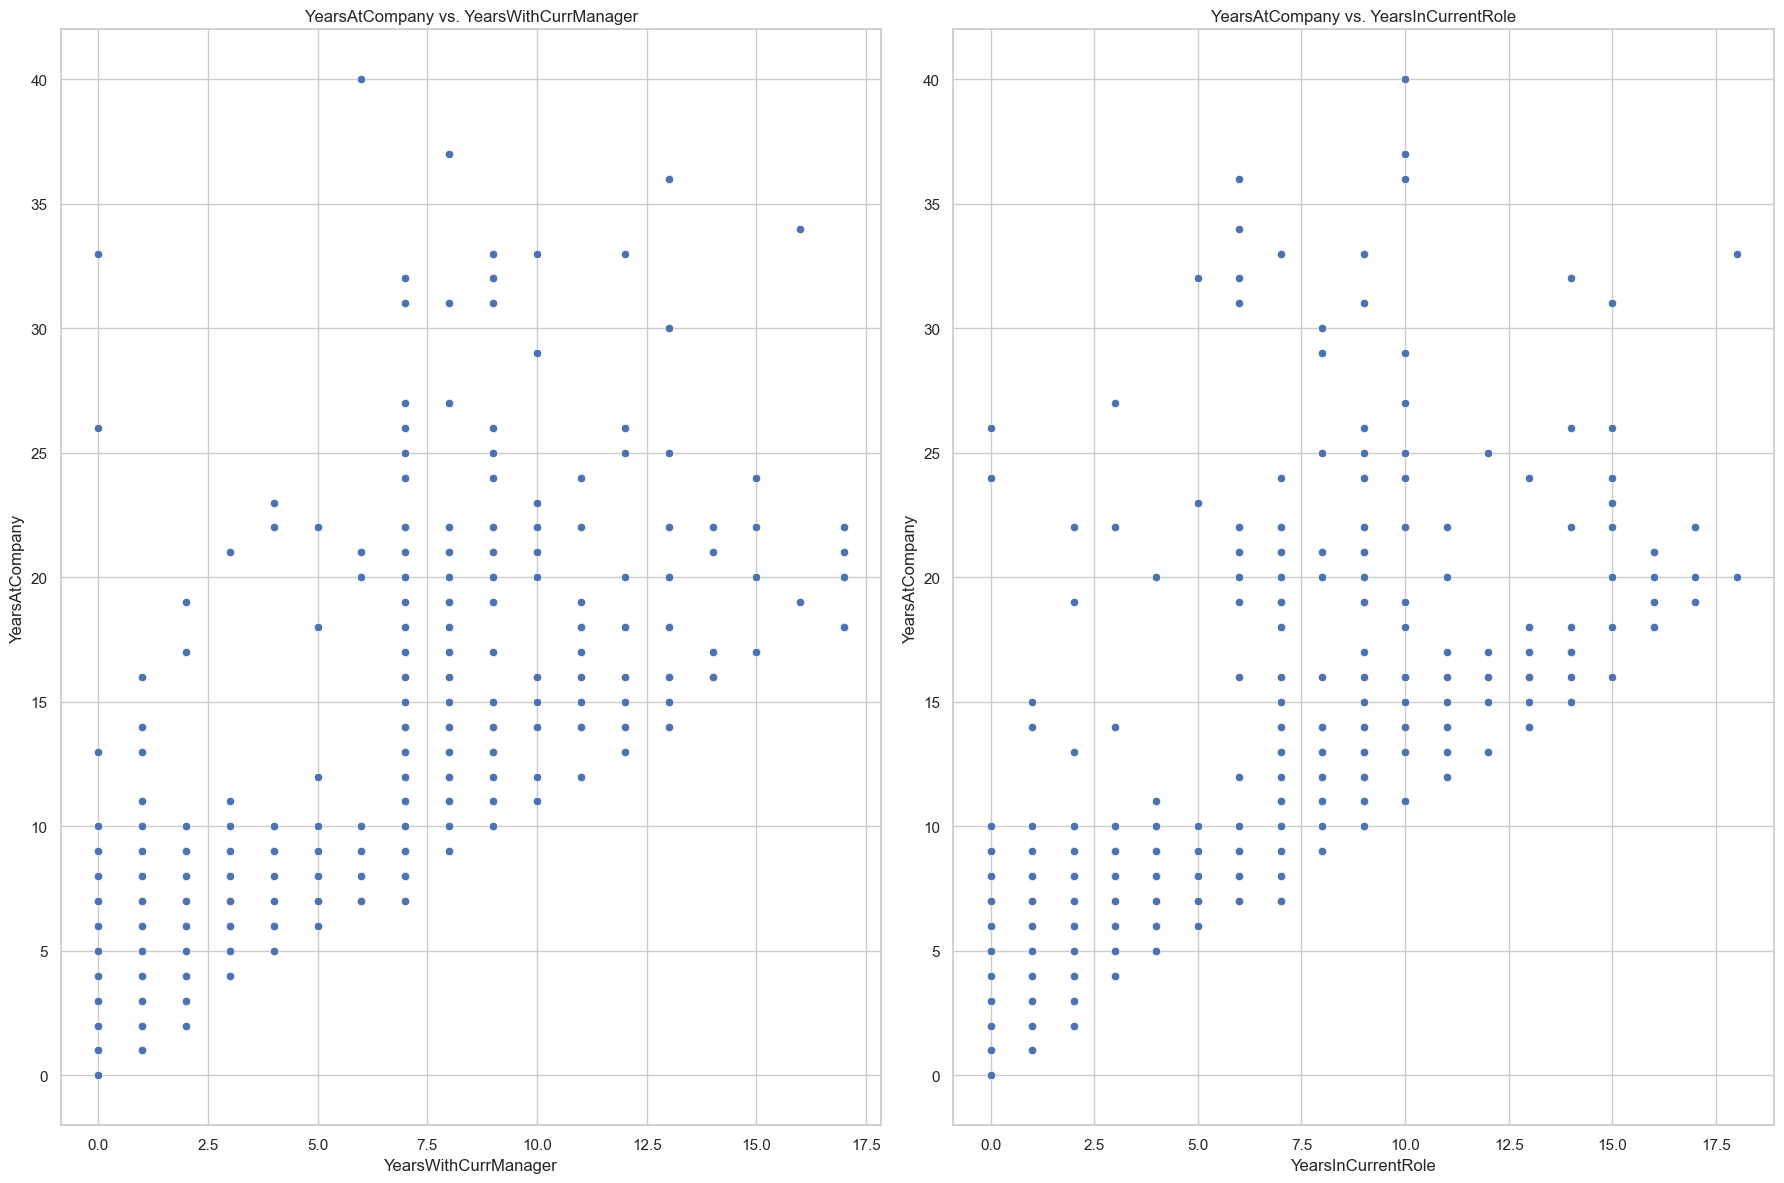

In [17]:
# Creating scatter plots to visualize the relationships
fig, axes = plt.subplots(1, 2, figsize=(18, 12))

# Relationship between YearsAtCompany and YearsWithCurrManager
sns.scatterplot(ax=axes[0], data=employee_data_cleaned, x='YearsWithCurrManager', y='YearsAtCompany')
axes[0].set_title('YearsAtCompany vs. YearsWithCurrManager')

# Relationship between YearsAtCompany and YearsInCurrentRole
sns.scatterplot(ax=axes[1], data=employee_data_cleaned, x='YearsInCurrentRole', y='YearsAtCompany')
axes[1].set_title('YearsAtCompany vs. YearsInCurrentRole')

plt.tight_layout()
plt.show()

These relationships suggest that the higher values in YearsAtCompany are not random outliers. Instead, they are consistent with patterns of longer tenures being associated with longer durations in current roles and more years with the current manager This indicates that these values represent a natural variation within the dataset, reflecting the career progression and stability of certain employees within the organization.

**Remark**- For most columns, the mean and median values are nearly similar. However, the **YearsSinceLastPromotion** column's mean value is over twice as significant as the median value. The median indicates that most employees were promoted just one year ago, whereas the mean suggests that most were promoted over two years ago. Therefore, the outliers should be removed to correct this discrepancy.

**1. Keep Contextually Relevant Outliers:** For fields like MonthlyIncome, TotalWorkingYears, YearsAtCompany,  where high values might realistically exist, we should keep the outliers as they could represent actual scenarios, such as high-income executives or long-tenured employees.

**2. Assess Skewed Distributions:** For PerformanceRating and TrainingTimesLastYear, the high number of outliers suggests a skewed distribution. This could be realistic (e.g., most employees have a standard performance rating, with a few exceptional cases). We will keep these outliers as they represent important variations.

**3. Review Outliers with Suspicious Counts:** In a real-world scenario, some employees might indeed have worked at a significantly higher number of companies compared to their peers. This could be due to a variety of reasons, such as career choices, industry norms, or personal circumstances. In such cases, these outliers represent genuine data points that provide insights into certain employee segments


**4. Variables with Few Outliers:** For variables like YearsInCurrentRole and YearsWithCurrManager, where the number of outliers is relatively low, it could be reasonable to keep them unless they represent impossible scenarios.


Given these considerations, the recommended approach would be to retain the outliers in this dataset except for 'YearsSinceLastPromotion' .

# **IV. Feature Engineering**

***a. Label Encoding Categorical Features***

In [18]:
#Attrition Label Encoding
employee_data_cleaned['Attrition'] = employee_data_cleaned['Attrition'].replace('Yes',2)
employee_data_cleaned['Attrition'] = employee_data_cleaned['Attrition'].replace('No',3)

#BusinessTravel Label Encoding
employee_data_cleaned['BusinessTravel'] = employee_data_cleaned['BusinessTravel'].replace('Travel_Rarely',2)
employee_data_cleaned['BusinessTravel'] = employee_data_cleaned['BusinessTravel'].replace('Travel_Frequently',3)
employee_data_cleaned['BusinessTravel'] = employee_data_cleaned['BusinessTravel'].replace('Non-Travel',4)

#OverTime Label Encoding
employee_data_cleaned['OverTime'] = employee_data_cleaned['OverTime'].replace('Yes',2)
employee_data_cleaned['OverTime'] = employee_data_cleaned['OverTime'].replace('No',3)

#Gender Label Encoding
employee_data_cleaned['Gender'] = employee_data_cleaned['Gender'].replace('Male',2)
employee_data_cleaned['Gender'] = employee_data_cleaned['Gender'].replace('Female',3)

#MaritalStatus Label Encoding
employee_data_cleaned['MaritalStatus'] = employee_data_cleaned['MaritalStatus'].replace('Single',2)
employee_data_cleaned['MaritalStatus'] = employee_data_cleaned['MaritalStatus'].replace('Married',3)
employee_data_cleaned['MaritalStatus'] = employee_data_cleaned['MaritalStatus'].replace('Divorced',4)

#Department Label Encoding
employee_data_cleaned['Department'] = employee_data_cleaned['Department'].replace('Sales',2)
employee_data_cleaned['Department'] = employee_data_cleaned['Department'].replace('Human Resources',3)
employee_data_cleaned['Department'] = employee_data_cleaned['Department'].replace('Research & Development',4)

#EducationField Label Encoding
employee_data_cleaned['EducationField'] = employee_data_cleaned['EducationField'].replace('Life Sciences',2)
employee_data_cleaned['EducationField'] = employee_data_cleaned['EducationField'].replace('Medical',3)
employee_data_cleaned['EducationField'] = employee_data_cleaned['EducationField'].replace('Marketing',4)
employee_data_cleaned['EducationField'] = employee_data_cleaned['EducationField'].replace('Technical Degree',2)
employee_data_cleaned['EducationField'] = employee_data_cleaned['EducationField'].replace('Human Resources',3)
employee_data_cleaned['EducationField'] = employee_data_cleaned['EducationField'].replace('Other',4)

#JobRole Label Encoding
employee_data_cleaned['JobRole'] = employee_data_cleaned['JobRole'].replace('Sales Executive',2)
employee_data_cleaned['JobRole'] = employee_data_cleaned['JobRole'].replace('Manufacturing Director',3)
employee_data_cleaned['JobRole'] = employee_data_cleaned['JobRole'].replace('Healthcare Representative',4)
employee_data_cleaned['JobRole'] = employee_data_cleaned['JobRole'].replace('Manager',2)
employee_data_cleaned['JobRole'] = employee_data_cleaned['JobRole'].replace('Research Director',3)
employee_data_cleaned['JobRole'] = employee_data_cleaned['JobRole'].replace('Laboratory Technician',4)
employee_data_cleaned['JobRole'] = employee_data_cleaned['JobRole'].replace('Sales Representative',2)
employee_data_cleaned['JobRole'] = employee_data_cleaned['JobRole'].replace('Research Scientist',3)
employee_data_cleaned['JobRole'] = employee_data_cleaned['JobRole'].replace('Human Resources',4)

***b. Remove strong correlated columns***

In [19]:
employee_data_cleaned = employee_data_cleaned.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

We are removing 'MonthlyIncome' due to its  strong correlation  'JobLevel'. Similarly we are dropping 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', and 'YearsSinceLastPromotion' due to their strong correlations with 'TotalWorkingYears'. This decision is based on reducing multicollinearity, which can negatively impact the performance of predictive models.

***c. Scaling and Spilting***

In [20]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
norm = scaler.fit_transform(employee_data_cleaned)
norm_df = pd.DataFrame(norm,columns=employee_data_cleaned.columns)

In [21]:
X = pd.DataFrame(norm_df.drop(columns=['Attrition']))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1,1)

In [100]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [111]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
smote_train , smote_target = oversampler.fit_resample(x_train,y_train)

class_distribution_before = pd.DataFrame(Y, columns=['Attrition']).value_counts(normalize=True) * 100
class_distribution_after = pd.DataFrame(smote_target, columns=['Attrition']).value_counts(normalize=True) * 100

print("Class imbalance before:\n", class_distribution_before)
print("Class imbalance after:\n", class_distribution_after)

Class imbalance before:
 Attrition
1.0          83.877551
0.0          16.122449
dtype: float64
Class imbalance after:
 Attrition
0.0          50.0
1.0          50.0
dtype: float64


# **V. Coding Implementation**

**Function for Various Metric Evaluation for Models**

In [24]:
#common funtion to evaluate models accuracy, precision, recall, f1, roc_auc and training time.
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    end = time.time()

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "training_time": end - start
    } 

# **1. Random Forest**

**Random Forest Hyper parameters**

In [25]:
#grid of hyperparameter values
rf_param_grid = {
    'n_estimators': [50,80, 100, 200],
    'max_depth': [3,5,10,15,20,30],
    'min_samples_split': [3,5,8],
    'min_samples_leaf': [1,2,3,5,10]
}

**A. with cv=2**

In [26]:
#Hyperparameter tuning for Random Forest
rf_classifier = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=2, n_jobs=-1, verbose=2)
rf_grid_search.fit(smote_train, smote_target)
best_rf_model = rf_grid_search.best_estimator_
best_rf_metrics = train_evaluate_model(best_rf_model, smote_train, x_test, smote_target, y_test)
print("Random Forest Metrics:", best_rf_metrics)

Fitting 2 folds for each of 360 candidates, totalling 720 fits
Random Forest Metrics: {'accuracy': 0.8843537414965986, 'precision': 0.8989169675090253, 'recall': 0.9764705882352941, 'f1': 0.9360902255639099, 'roc_auc': 0.6292609351432881, 'training_time': 0.8245859146118164}


**B. with cv=3**

In [27]:
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(smote_train, smote_target)
best_rf_model = rf_grid_search.best_estimator_
best_rf_metrics = train_evaluate_model(best_rf_model, smote_train, x_test, smote_target, y_test)

print("Random Forest Metrics:", best_rf_metrics)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Random Forest Metrics: {'accuracy': 0.8707482993197279, 'precision': 0.8861209964412812, 'recall': 0.9764705882352941, 'f1': 0.9291044776119403, 'roc_auc': 0.5779788838612367, 'training_time': 2.99117112159729}


**C. with cv=4**

In [28]:
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=4, n_jobs=-1, verbose=2)
rf_grid_search.fit(smote_train, smote_target)
best_rf_model = rf_grid_search.best_estimator_
best_rf_metrics = train_evaluate_model(best_rf_model, smote_train, x_test, smote_target, y_test)

print("Random Forest Metrics:", best_rf_metrics)

Fitting 4 folds for each of 360 candidates, totalling 1440 fits
Random Forest Metrics: {'accuracy': 0.8741496598639455, 'precision': 0.8892857142857142, 'recall': 0.9764705882352941, 'f1': 0.930841121495327, 'roc_auc': 0.5907993966817496, 'training_time': 0.6180133819580078}


**Important Features**

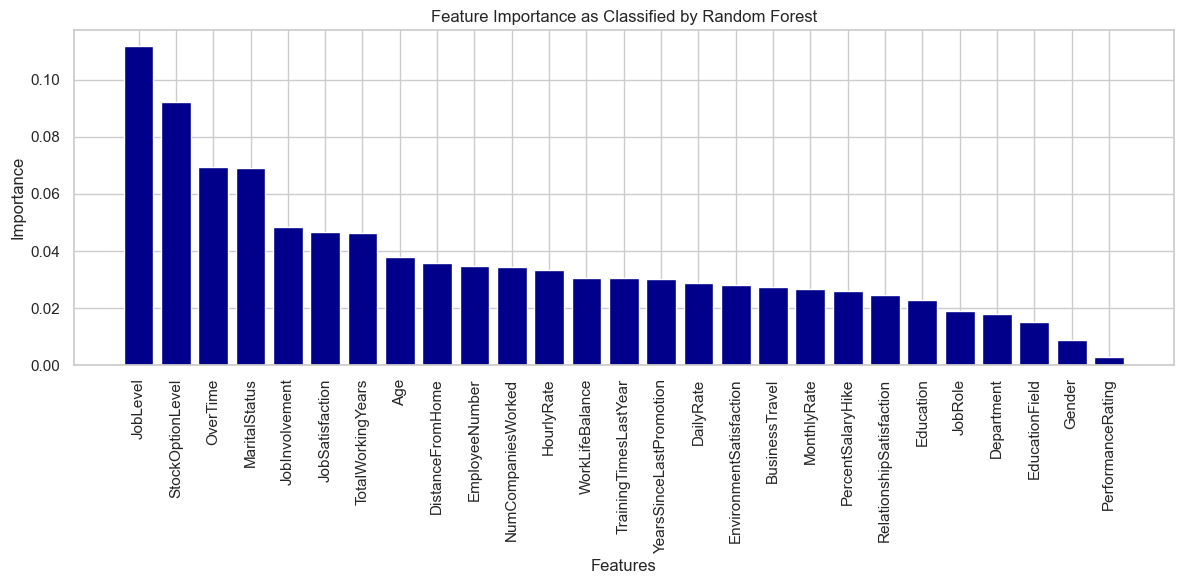

In [91]:
#Feature classified as important by Random Forest
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': smote_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance as Classified by Random Forest')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

# **2. Gradient Boosting**

In [30]:
#grid of hyperparameter values
gb_param_grid = {
    'n_estimators': [50,80, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3,5,10,15,20,30]
}#final hyperparameter settings

**A. with cv=2**

In [32]:
# Hyperparameter tuning for Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=2, n_jobs=-1, verbose=2)
gb_grid_search.fit(smote_train, smote_target)
best_gb_model = gb_grid_search.best_estimator_
best_gb_metrics = train_evaluate_model(best_gb_model, smote_train, x_test, smote_target, y_test)

print("Gradient Boosting Metrics:", best_gb_metrics)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
Gradient Boosting Metrics: {'accuracy': 0.8639455782312925, 'precision': 0.8966789667896679, 'recall': 0.9529411764705882, 'f1': 0.9239543726235742, 'roc_auc': 0.6174962292609352, 'training_time': 2.0261569023132324}


**B. with cv=3**

In [33]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(smote_train, smote_target)
best_gb_model = gb_grid_search.best_estimator_
best_gb_metrics = train_evaluate_model(best_gb_model, smote_train, x_test, smote_target, y_test)

print("Gradient Boosting Metrics:", best_gb_metrics)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Gradient Boosting Metrics: {'accuracy': 0.8639455782312925, 'precision': 0.8966789667896679, 'recall': 0.9529411764705882, 'f1': 0.9239543726235742, 'roc_auc': 0.6174962292609352, 'training_time': 2.099942207336426}


**C. with cv=4**

In [34]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, cv=4, n_jobs=-1, verbose=2)
gb_grid_search.fit(smote_train, smote_target)
best_gb_model = gb_grid_search.best_estimator_
best_gb_metrics = train_evaluate_model(best_gb_model, smote_train, x_test, smote_target, y_test)

print("Gradient Boosting Metrics:", best_gb_metrics)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
Gradient Boosting Metrics: {'accuracy': 0.8639455782312925, 'precision': 0.8909090909090909, 'recall': 0.9607843137254902, 'f1': 0.9245283018867925, 'roc_auc': 0.5957767722473605, 'training_time': 12.05003309249878}


**Important Features**

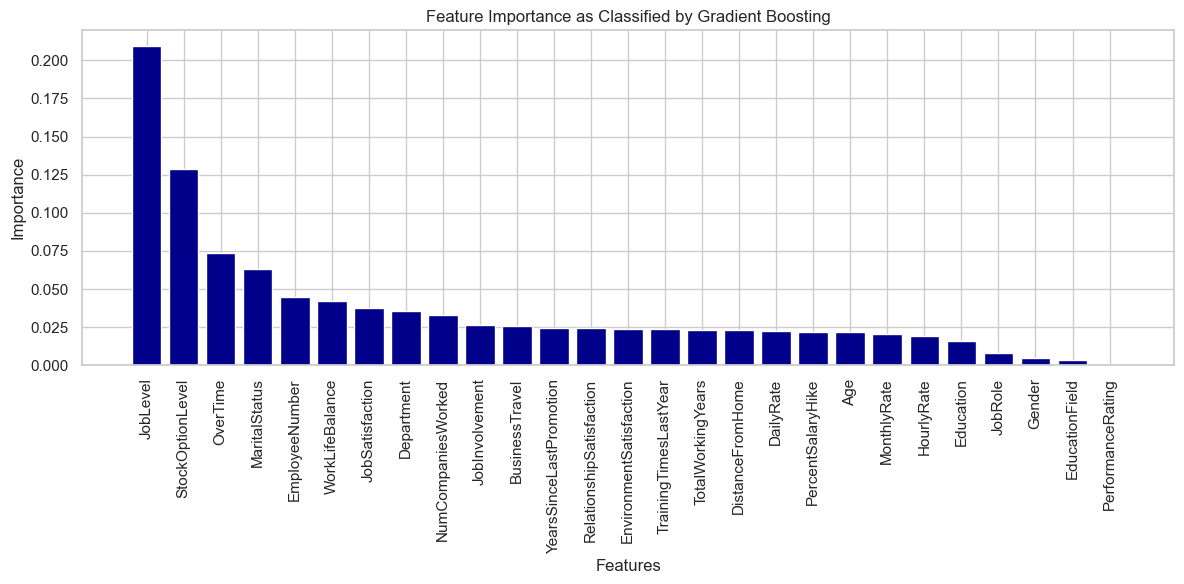

In [85]:
#Feature classified as important by Gradient Boosting
feature_importances = best_gb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': smote_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance as Classified by Gradient Boosting')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

# **3. Light Gradient Boosting**

In [37]:
#grid of hyperparameter values
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50,80, 100, 200]
}#final hyperparameter settings

**A. with cv=2**

In [39]:
# Hyperparameter tuning for LightGBM
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=2, n_jobs=-1, verbose=2)
lgb_grid_search.fit(smote_train, smote_target)
best_lgb_model = lgb_grid_search.best_estimator_
best_lgb_metrics = train_evaluate_model(best_lgb_model, smote_train, x_test, smote_target, y_test)

print("LightGBM Metrics:", best_lgb_metrics)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5765
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5765
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Metrics: {'accuracy': 0.8707482993197279, 'precision': 0.90036

**B. with cv=3**

In [40]:
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=3, n_jobs=-1, verbose=2)
lgb_grid_search.fit(smote_train, smote_target)
best_lgb_model = lgb_grid_search.best_estimator_
best_lgb_metrics = train_evaluate_model(best_lgb_model, smote_train, x_test, smote_target, y_test)

print("LightGBM Metrics:", best_lgb_metrics)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5765
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5765
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Metrics: {'accuracy': 0.8571428571428571, 'precision': 0.89591

**C. with cv=4**

In [41]:
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(random_state=42), lgb_param_grid, cv=4, n_jobs=-1, verbose=2)
lgb_grid_search.fit(smote_train, smote_target)
best_lgb_model = lgb_grid_search.best_estimator_
best_lgb_metrics = train_evaluate_model(best_lgb_model, smote_train, x_test, smote_target, y_test)

print("LightGBM Metrics:", best_lgb_metrics)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5765
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5765
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGB

**Important Features**

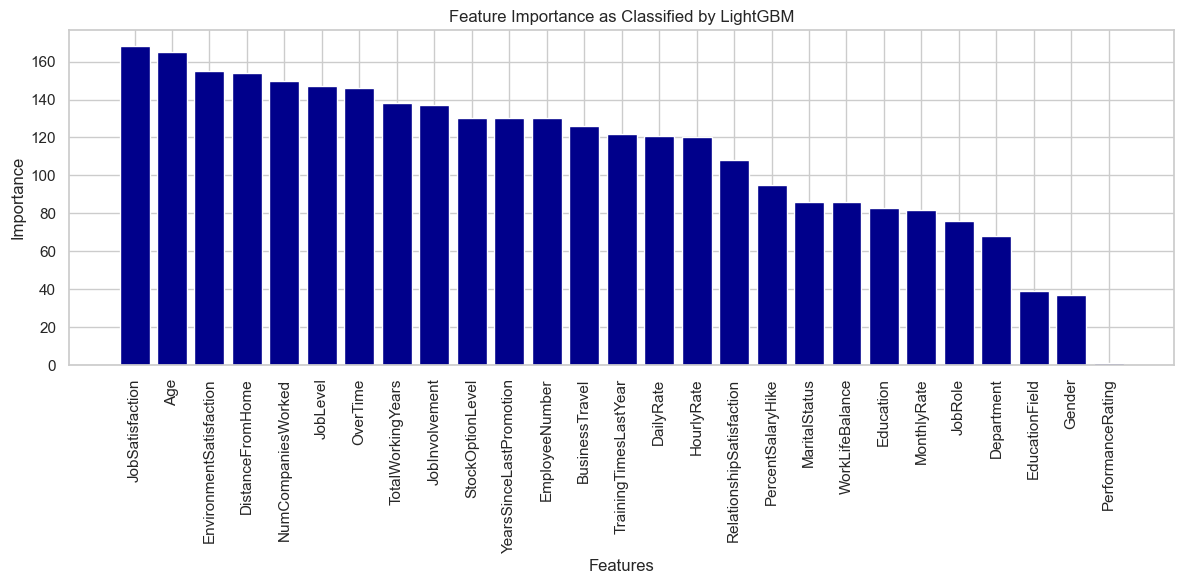

In [84]:
#Feature classified as important by Gradient Boosting
feature_importances = best_lgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': smote_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance as Classified by LightGBM')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

# **4. XGBoost**

In [47]:
#grid of hyperparameter values
xgb_param_grid = {
    'n_estimators': [50,80, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3,5,10,15,20,30]
}#final hyperparameter setting

**A. with cv=2**

In [48]:
# Hyperparameter tuning for XGBoost
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=2, n_jobs=-1, verbose=2)
xgb_grid_search.fit(smote_train, smote_target)
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_metrics = train_evaluate_model(best_xgb_model, smote_train, x_test, smote_target, y_test)

print("XGBoost Metrics:", best_xgb_metrics)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
XGBoost Metrics: {'accuracy': 0.8605442176870748, 'precision': 0.8933823529411765, 'recall': 0.9529411764705882, 'f1': 0.9222011385199241, 'roc_auc': 0.6046757164404223, 'training_time': 0.5667200088500977}


**B. with cv=3**

In [49]:
# Hyperparameter tuning for XGBoost
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=3, n_jobs=-1, verbose=2)
xgb_grid_search.fit(smote_train, smote_target)
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_metrics = train_evaluate_model(best_xgb_model, smote_train, x_test, smote_target, y_test)

print("XGBoost Metrics:", best_xgb_metrics)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
XGBoost Metrics: {'accuracy': 0.8639455782312925, 'precision': 0.8909090909090909, 'recall': 0.9607843137254902, 'f1': 0.9245283018867925, 'roc_auc': 0.5957767722473605, 'training_time': 0.8816900253295898}


**C. with cv=4**

In [50]:
# Hyperparameter tuning for XGBoost
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=4, n_jobs=-1, verbose=2)
xgb_grid_search.fit(smote_train, smote_target)
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_metrics = train_evaluate_model(best_xgb_model, smote_train, x_test, smote_target, y_test)

print("XGBoost Metrics:", best_xgb_metrics)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
XGBoost Metrics: {'accuracy': 0.8639455782312925, 'precision': 0.8966789667896679, 'recall': 0.9529411764705882, 'f1': 0.9239543726235742, 'roc_auc': 0.6174962292609352, 'training_time': 0.3670213222503662}


**Important Features**

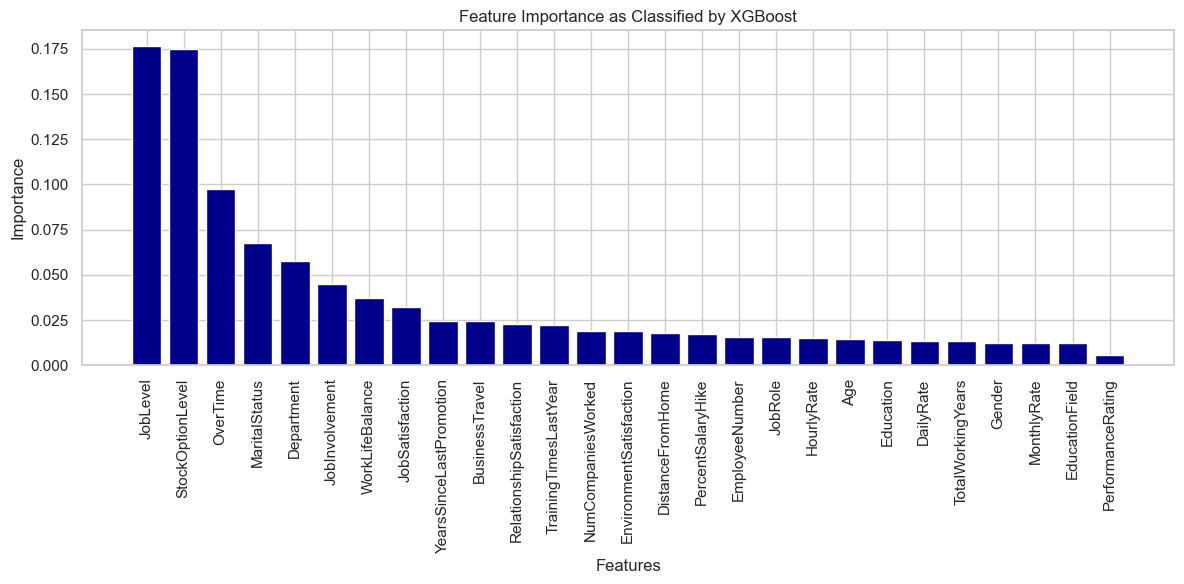

In [86]:
#Feature classified as important by Gradient Boosting
feature_importances = best_xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': smote_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance as Classified by XGBoost')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

# **5. Logistic Regression**

In [52]:
#grid of hyperparameter values
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}#final hyperparameter setings

**A. with cv=2**

In [53]:
logreg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=5000)
logreg_grid_search = GridSearchCV(
    logreg_model,
    logreg_param_grid,
    cv=2,
    n_jobs=-1,
    verbose=2
)
logreg_grid_search.fit(smote_train, smote_target)
best_logreg_model = logreg_grid_search.best_estimator_
best_logistic_metrics = train_evaluate_model(best_logreg_model, smote_train, x_test, smote_target, y_test)

print("Logistic Metrics:", best_logistic_metrics)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Logistic Metrics: {'accuracy': 0.7380952380952381, 'precision': 0.9405940594059405, 'recall': 0.7450980392156863, 'f1': 0.8315098468271335, 'roc_auc': 0.7187028657616893, 'training_time': 0.09075736999511719}


**B. with cv=3**

In [54]:
logreg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=5000)
logreg_grid_search = GridSearchCV(
    logreg_model,
    logreg_param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)
logreg_grid_search.fit(smote_train, smote_target)
best_logreg_model = logreg_grid_search.best_estimator_
best_logistic_metrics = train_evaluate_model(best_logreg_model, smote_train, x_test, smote_target, y_test)

print("Logistic Metrics:", best_logistic_metrics)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Logistic Metrics: {'accuracy': 0.7482993197278912, 'precision': 0.9414634146341463, 'recall': 0.7568627450980392, 'f1': 0.8391304347826087, 'roc_auc': 0.7245852187028657, 'training_time': 0.013969182968139648}


**C. with cv=4**

In [55]:
logreg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=5000)
logreg_grid_search = GridSearchCV(
    logreg_model,
    logreg_param_grid,
    cv=4,
    n_jobs=-1,
    verbose=2
)
logreg_grid_search.fit(smote_train, smote_target)
best_logreg_model = logreg_grid_search.best_estimator_
best_logistic_metrics = train_evaluate_model(best_logreg_model, smote_train, x_test, smote_target, y_test)

print("Logistic Metrics:", best_logistic_metrics)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Logistic Metrics: {'accuracy': 0.7482993197278912, 'precision': 0.9414634146341463, 'recall': 0.7568627450980392, 'f1': 0.8391304347826087, 'roc_auc': 0.7245852187028657, 'training_time': 0.011968612670898438}


**Important Features**

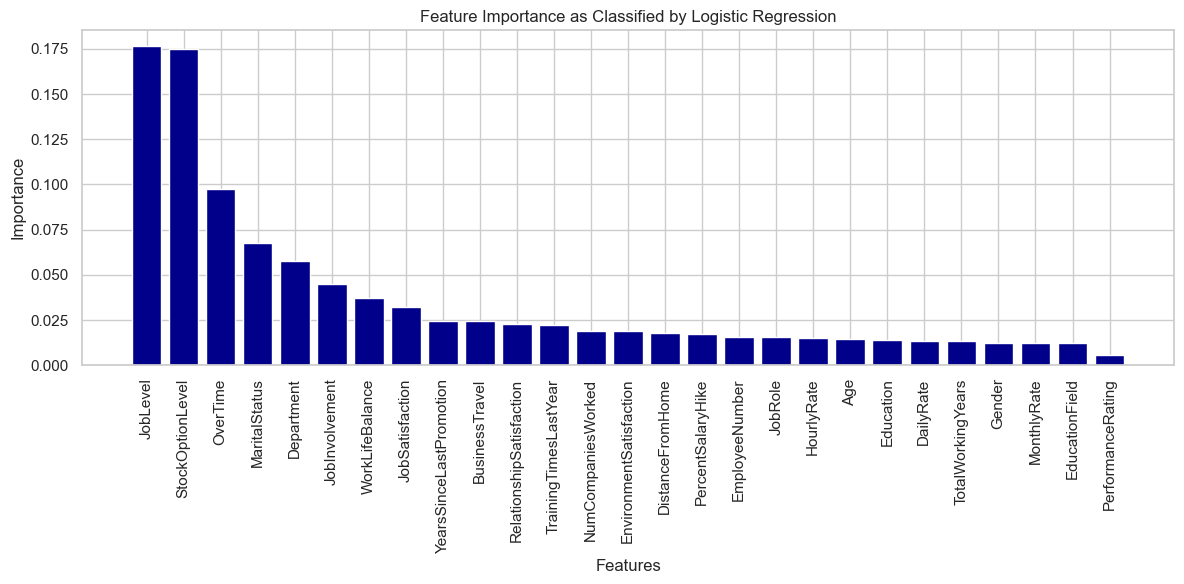

In [87]:
#Feature classified as important by Logistic Regression
coefficients = best_logreg_model.coef_[0]
feature_names = smote_train.columns

# Create a DataFrame to display feature names and coefficients
feature_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='darkBlue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance as Classified by Logistic Regression')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

#  5. SVM 

In [57]:
#grid of hyperparameter values
svm_param_grid = {
    'svm__C': [0.1, 1, 10],            # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],  # Kernel type
    'svm__gamma': ['scale', 'auto'],   # Kernel coefficient for 'rbf' kernel
}

**A. with cv=2**

In [58]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('svm', SVC())                  # SVM classifier
])
svm_grid_search = GridSearchCV(
    pipeline,              # The pipeline with scaling and SVM
    svm_param_grid,         # The hyperparameter grid
    cv=2,                   # Cross-validation folds
    n_jobs=-1,              # Use all available CPU cores for parallelization
    verbose=2               # Display detailed information about the grid search
)
# Fit the grid search to the training data
svm_grid_search.fit(smote_train, smote_target)

# Get the best SVM model found by the grid search
best_svm_model = svm_grid_search.best_estimator_
best_svm_metrics = train_evaluate_model(best_svm_model, smote_train, x_test, smote_target, y_test)

print("SVM Metrics:", best_svm_metrics)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
SVM Metrics: {'accuracy': 0.8741496598639455, 'precision': 0.9007352941176471, 'recall': 0.9607843137254902, 'f1': 0.9297912713472486, 'roc_auc': 0.6342383107088989, 'training_time': 0.23337721824645996}


**B. with cv=3**

In [59]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('svm', SVC())                  # SVM classifier
])
svm_grid_search = GridSearchCV(
    pipeline,              # The pipeline with scaling and SVM
    svm_param_grid,         # The hyperparameter grid
    cv=3,                   # Cross-validation folds
    n_jobs=-1,              # Use all available CPU cores for parallelization
    verbose=2               # Display detailed information about the grid search
)
# Fit the grid search to the training data
svm_grid_search.fit(smote_train, smote_target)

# Get the best SVM model found by the grid search
best_svm_model = svm_grid_search.best_estimator_
best_svm_metrics = train_evaluate_model(best_svm_model, smote_train, x_test, smote_target, y_test)

print("SVM Metrics:", best_svm_metrics)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM Metrics: {'accuracy': 0.8741496598639455, 'precision': 0.9007352941176471, 'recall': 0.9607843137254902, 'f1': 0.9297912713472486, 'roc_auc': 0.6342383107088989, 'training_time': 0.2037351131439209}


**C. with cv=4**

In [60]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('svm', SVC())                  # SVM classifier
])
svm_grid_search = GridSearchCV(
    pipeline,              # The pipeline with scaling and SVM
    svm_param_grid,         # The hyperparameter grid
    cv=4,                   # Cross-validation folds
    n_jobs=-1,              # Use all available CPU cores for parallelization
    verbose=2               # Display detailed information about the grid search
)
# Fit the grid search to the training data
svm_grid_search.fit(smote_train, smote_target)

# Get the best SVM model found by the grid search
best_svm_model = svm_grid_search.best_estimator_
best_svm_metrics = train_evaluate_model(best_svm_model, smote_train, x_test, smote_target, y_test)

print("SVM Metrics:", best_svm_metrics)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
SVM Metrics: {'accuracy': 0.8741496598639455, 'precision': 0.9007352941176471, 'recall': 0.9607843137254902, 'f1': 0.9297912713472486, 'roc_auc': 0.6342383107088989, 'training_time': 0.36901092529296875}


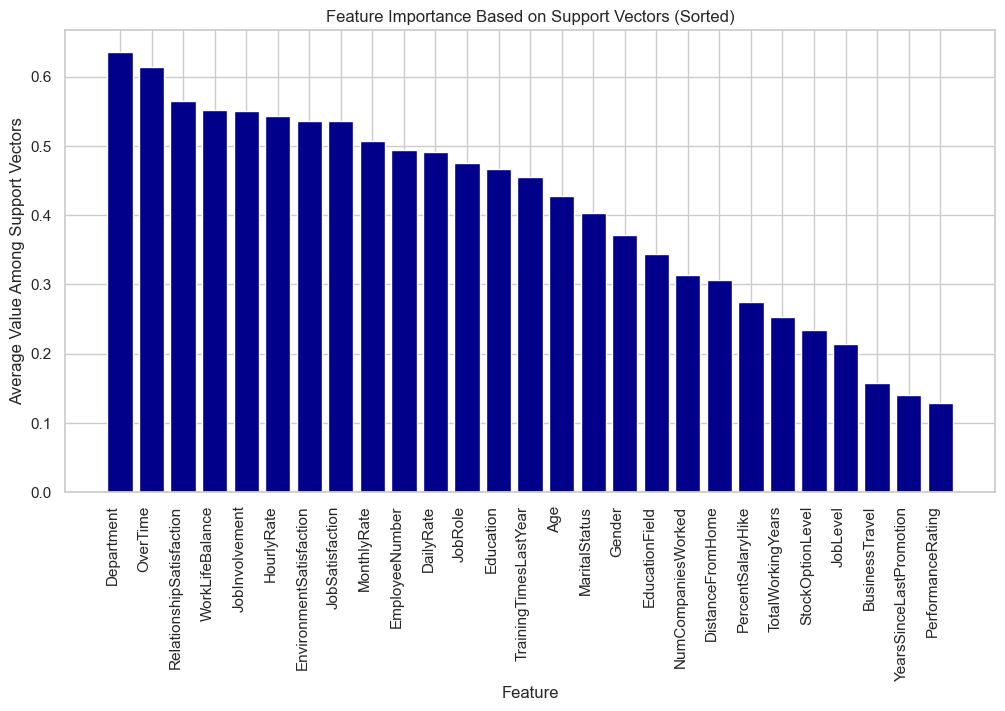

In [96]:
# Sort feature importance based on average values among support vectors
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = feature_importance.iloc[sorted_indices]

# Visualize sorted feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_names)), sorted_feature_importance, color='darkBlue')
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90, ha='right')
plt.xlabel('Feature')
plt.ylabel('Average Value Among Support Vectors')
plt.title('Feature Importance Based on Support Vectors (Sorted)')
plt.show()


In [94]:
# Create a DataFrame to hold the best metrics and hyperparameters for each model
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'LightGBM', 'XGBoost', 'Logistic Regression', 'SVM'],
    'Accuracy': [best_rf_metrics['accuracy'], best_gb_metrics['accuracy'], best_lgb_metrics['accuracy'],
                 best_xgb_metrics['accuracy'], best_logistic_metrics['accuracy'], best_svm_metrics['accuracy']],
    'Precision': [best_rf_metrics['precision'], best_gb_metrics['precision'], best_lgb_metrics['precision'],
                  best_xgb_metrics['precision'], best_logistic_metrics['precision'], best_svm_metrics['precision']],
    'Recall': [best_rf_metrics['recall'], best_gb_metrics['recall'], best_lgb_metrics['recall'],
               best_xgb_metrics['recall'], best_logistic_metrics['recall'], best_svm_metrics['recall']],
    'F1 Score': [best_rf_metrics['f1'], best_gb_metrics['f1'], best_lgb_metrics['f1'],
                 best_xgb_metrics['f1'], best_logistic_metrics['f1'], best_svm_metrics['f1']],
    'ROC AUC': [best_rf_metrics['roc_auc'], best_gb_metrics['roc_auc'], best_lgb_metrics['roc_auc'],
                best_xgb_metrics['roc_auc'], best_logistic_metrics['roc_auc'], best_svm_metrics['roc_auc']],
    'Best Hyperparameters': [rf_grid_search.best_params_, gb_grid_search.best_params_, lgb_grid_search.best_params_,
                             xgb_grid_search.best_params_, logreg_grid_search.best_params_, svm_grid_search.best_params_]
})

# Convert hyperparameters dictionary to string for better display
model_comparison['Best Hyperparameters'] = model_comparison['Best Hyperparameters'].apply(lambda x: ', '.join([f'{k}: {v}' for k, v in x.items()]))

# Melting the DataFrame for Plotly
melted_model_comparison = model_comparison.melt(id_vars=['Model', 'Best Hyperparameters'], var_name='Metric', value_name='Value')

# Plotting
fig = px.bar(melted_model_comparison, x='Model', y='Value', color='Metric', text='Value', 
             hover_data=['Best Hyperparameters'], barmode='group')

fig.update_layout(title='Comparison of Machine Learning Models',
                  xaxis_title='Model',
                  yaxis_title='Score',
                  legend_title='Metrics',
                  uniformtext_minsize=8, 
                  uniformtext_mode='hide')

fig.show()

Analyzing the provided metrics for each model gives us a detailed understanding of their performance characteristics:

1. **Random Forest Metrics:**
    - **Accuracy**: 87.42% - Solid general performance.
    - **Precision:** 88.93% - High precision indicates accurate predictions in attrition cases.
    - **Recall:** 97.65% - Excellent recall, showing strong capability in identifying true attrition cases.
    - **F1 Score:** 93.08% - High F1 score reflects a strong balance between precision and recall.
    - **ROC AUC:** 59.08% - Good at differentiating between classes, though not exceptional.

2. **Gradient Boosting Metrics:**

    - **Accuracy**: 86.39% - Comparable to Random Forest, indicating consistent performance.
    - **Precision**: 89.09% - Slightly lower than Random Forest, but still high.
    - **Recall**: 96.08% - Very high, suggesting effective identification of true attrition cases.
    - **F1 Score**: 92.45% - Indicates a strong balance between precision and recall.
    - **ROC AUC**: 59.58% - Similar to Random Forest in distinguishing between classes.

3. **LightGBM Metrics:**

    - **Accuracy**: 86.73% - Slightly lower than other models, but still robust.
    - **Precision**: 89.71% - Good precision, indicating reliable predictions.
    - **Recall**: 95.69% - Very high, showcasing strong capability in identifying attrition cases.
    - **F1 Score**: 92.60% - Reflects a well-balanced precision and recall.
    - **ROC AUC**: 61.95% - The highest among the models, indicating superior class differentiation.

4. **XGBoost Metrics:**

    - **Accuracy**: 86.39% - Comparable to Gradient Boosting, indicating strong performance.
    - **Precision**: 89.67% - High precision, suggesting accurate predictions of attrition.
    - **Recall**: 95.29% - Very effective in identifying true attrition cases.
    - **F1 Score**: 92.40% - Reflects a good balance between precision and recall.
    - **ROC AUC**: 61.75% - Close to LightGBM, showing strong ability in class distinction.

5. **Logistic Regression Metrics:**

    - **Accuracy**: 74.83% - Lower than the ensemble methods, suggesting room for improvement.
    - **Precision**: 94.15% - Very high, excellent in predicting attrition accurately.
    - **Recall**: 75.69% - Good, but not as high as the ensemble models.
    - **F1 Score**: 83.91% - Good balance, but lower than the ensemble models.
    - **ROC AUC**: 72.46% - The highest, showing excellent class differentiation.

6. **SVM Metrics:**

    - **Accuracy**: 87.42% - Similar to Random Forest, showing strong performance.
    - **Precision**: 90.07% - The highest among the models, indicating very accurate predictions.
    - **Recall**: 96.08% - Very high, effective in identifying true cases.
    - **F1 Score**: 92.98% - Indicates a superior balance between precision and recall.
    - **ROC AUC**: 63.42% - Excellent in differentiating between the classes.


### Insights:

A model with high recall effectively identifies a higher proportion of true positive attrition cases. This capability is crucial for proactive human resource management. It allows for timely intervention strategies to retain talent, plan for potential staff shortages, and maintain organizational knowledge and stability. High recall enables employers to be better equipped to anticipate and act on potential employee turnover before it happens. **In summary, the Random Forest model, with its highest recall, becomes a powerful tool in the proactive management of employee attrition.**